**Regresión logistica.**

*Predicción de diabetes*

Hello, I'm Go1234550

**Importamos las librerías**

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

**Cargamos el conjunto de datos**

Usaremos el archivo CSV descargado del dataset para la predicción de diabetes.

* Analizaremos las variables que lo conforman para seleccionar los datos con los que trabajaremos.

*Link del dataset: https://www.kaggle.com/datasets/kandij/diabetes-dataset/data*

In [37]:
#Cargar datos de nuestro csv
diabetes = pd.read_csv('diabetes2.csv')
#Mostrar el dataset
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
494,3,80,0,0,0,0.0,0.174,22,0
495,6,166,74,0,0,26.6,0.304,66,0
496,5,110,68,0,0,26.0,0.292,30,0
497,2,81,72,15,76,30.1,0.547,25,0


In [38]:
#Mostrar informacion sobre el conjunto de datos
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB


<AxesSubplot:>

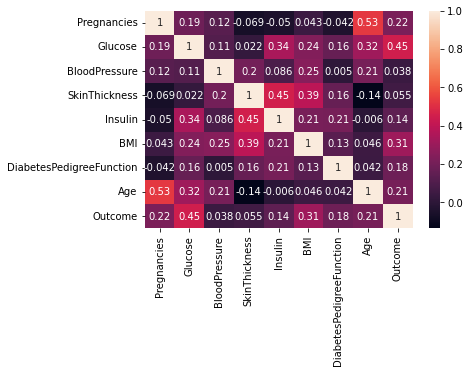

In [39]:
#Analizamos la correlación entre las variables
sns.heatmap(diabetes.corr(), annot=True)

**Selección de las variables con las que trabajaremos**

Podemos notar que cada variable tiene su relación con la variable *Outcome* aunque de diversas formas.

Para este modelo, trabajaremos con todas las variables del dataset para aumentar la precisión.

In [40]:
#Asignamos nuestras variables independientes
X = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
#Tomamos la columna de Outcome como nuestra variable dependiente
y = diabetes['Outcome']

**Creacion de la clase de la regresion logistica**

Haremos uso del gradiente descendente.

In [41]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.losses = []
    #Funcion sigmoide
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    #Funcion de perdida
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    #Entrenamiento del modelo
    def fit(self, X, y):
        # Inicializar los parámetros del modelo
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradiente descendente para actualizar los parámetros
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Calcular la pérdida y guardarla para su visualización
            loss = self.loss(y_predicted, y)
            self.losses.append(loss)

            # Calcular gradientes
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Actualizar los parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    #Predicción
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

**Realizamos el split de nuestro conjunto de datos**
* Entrenamiento: 30%
* Prubeas: 70%

In [42]:
from sklearn.model_selection import train_test_split
#Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

**Creamos el modelo y lo entrenamos**

Crearemos el modelo y lo entrenaremos, además realizaremos las predicciones.

In [43]:
#Crear el modelo
model = LogisticRegression(learning_rate=0.001, num_iterations=1000)
#Entrenar el modelo
model.fit(X_train, y_train)

In [44]:
#Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

**Evaluamos el modelo**

Utilizaremos como recurso la matriz de confusión, denotando cada una de sus métricas.

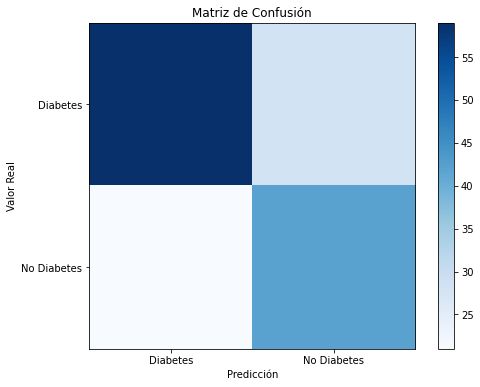

Matriz de confusión: 
[[59 28]
 [21 42]]


In [45]:
#Calcular la precisión del modelo
cm = confusion_matrix(y_test, y_pred)

#Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['Diabetes', 'No Diabetes'])
plt.yticks([0, 1], ['Diabetes', 'No Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

#Mostramos los valores de la matriz de confusión
print("Matriz de confusión: ")
print(cm)



**Calculamos métricas a partir de la matriz de confusión**

In [47]:
#Mostramos la tasa de verdaderos positivos del modelo
true_positive_rate = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Tasa de verdaderos positivos: ", true_positive_rate)

#Mostramos la tasa de falsos positivos del modelo
false_positive_rate = cm[1, 0] / (cm[1, 0] + cm[1, 1])
print("Tasa de falsos positivos: ", false_positive_rate)

#Mostramos la precisión del modelo
acurracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print("Precisión del modelo: ", acurracy)

#Mostramos la especificidad del modelo
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Especificidad del modelo: ", specificity)



Tasa de verdaderos positivos:  0.6781609195402298
Tasa de falsos positivos:  0.3333333333333333
Precisión del modelo:  0.6733333333333333
Especificidad del modelo:  0.6666666666666666
